# The seven scientists

In [1]:
import os

if "KERAS_BACKEND" not in os.environ:
    # set this to "torch", "tensorflow", or "jax"
    os.environ["KERAS_BACKEND"] = "jax"

import matplotlib.pyplot as plt
import numpy as np
import bayesflow as bf

INFO:bayesflow:Using backend 'jax'

In this section we will estimate the experimental skills of seven
scientists that measure the same quantity. We can reformulatted the
original model as such:

where $i \in (1, 2, ..., 7)$ is the index of the scientist.

Note that we put a prior on the measurement standard deviation rather
than on the measurement precision. Further, instead of using the rather
wide prior $\text{Gamma}(0.001, 1000)$, we use a more restricted
version. This prior still puts more mass on values close to zero, but
does not generate extreme values that might cause numerical stability
issues during data simulations. Similarly, we also reduced the variance
of the prior on $\mu$, as in the original example it appears
unnecessarily large.

### Simulator

In [2]:
def prior():
    mu=np.random.normal(scale=10)
    sigma=np.random.gamma(shape=1.5, scale=5, size=7)

    return dict(mu=mu, sigma=sigma)

def likelihood(mu, sigma):
    x=np.random.normal(loc=mu, scale=sigma)
    
    return dict(x=x)

simulator=bf.make_simulator([prior, likelihood])

### Approximator

In [3]:
adapter = (
    bf.Adapter()
    .constrain(["sigma"], lower=0)
    .standardize(include=["mu", "sigma"])
    .concatenate(["mu", "sigma"], into="inference_variables")
    .rename("x", "inference_conditions")
    )

In [4]:
workflow=bf.BasicWorkflow(
    simulator=simulator,
    adapter=adapter,
    inference_network=bf.networks.CouplingFlow()
)

### Training

In [ ]:
history=workflow.fit_online(epochs=50, num_batches_per_epoch=200, batch_size=512)

### Validation

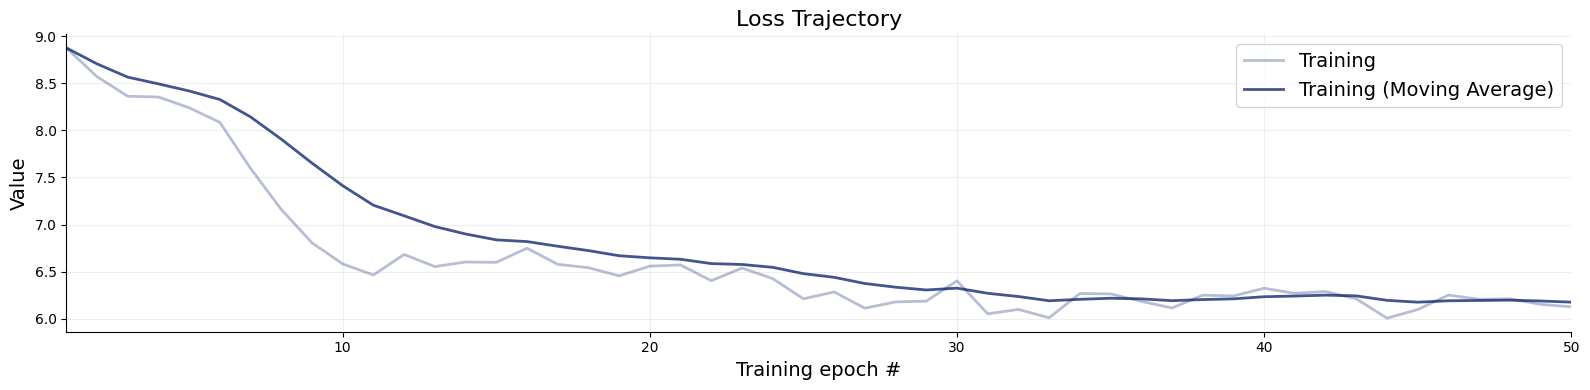

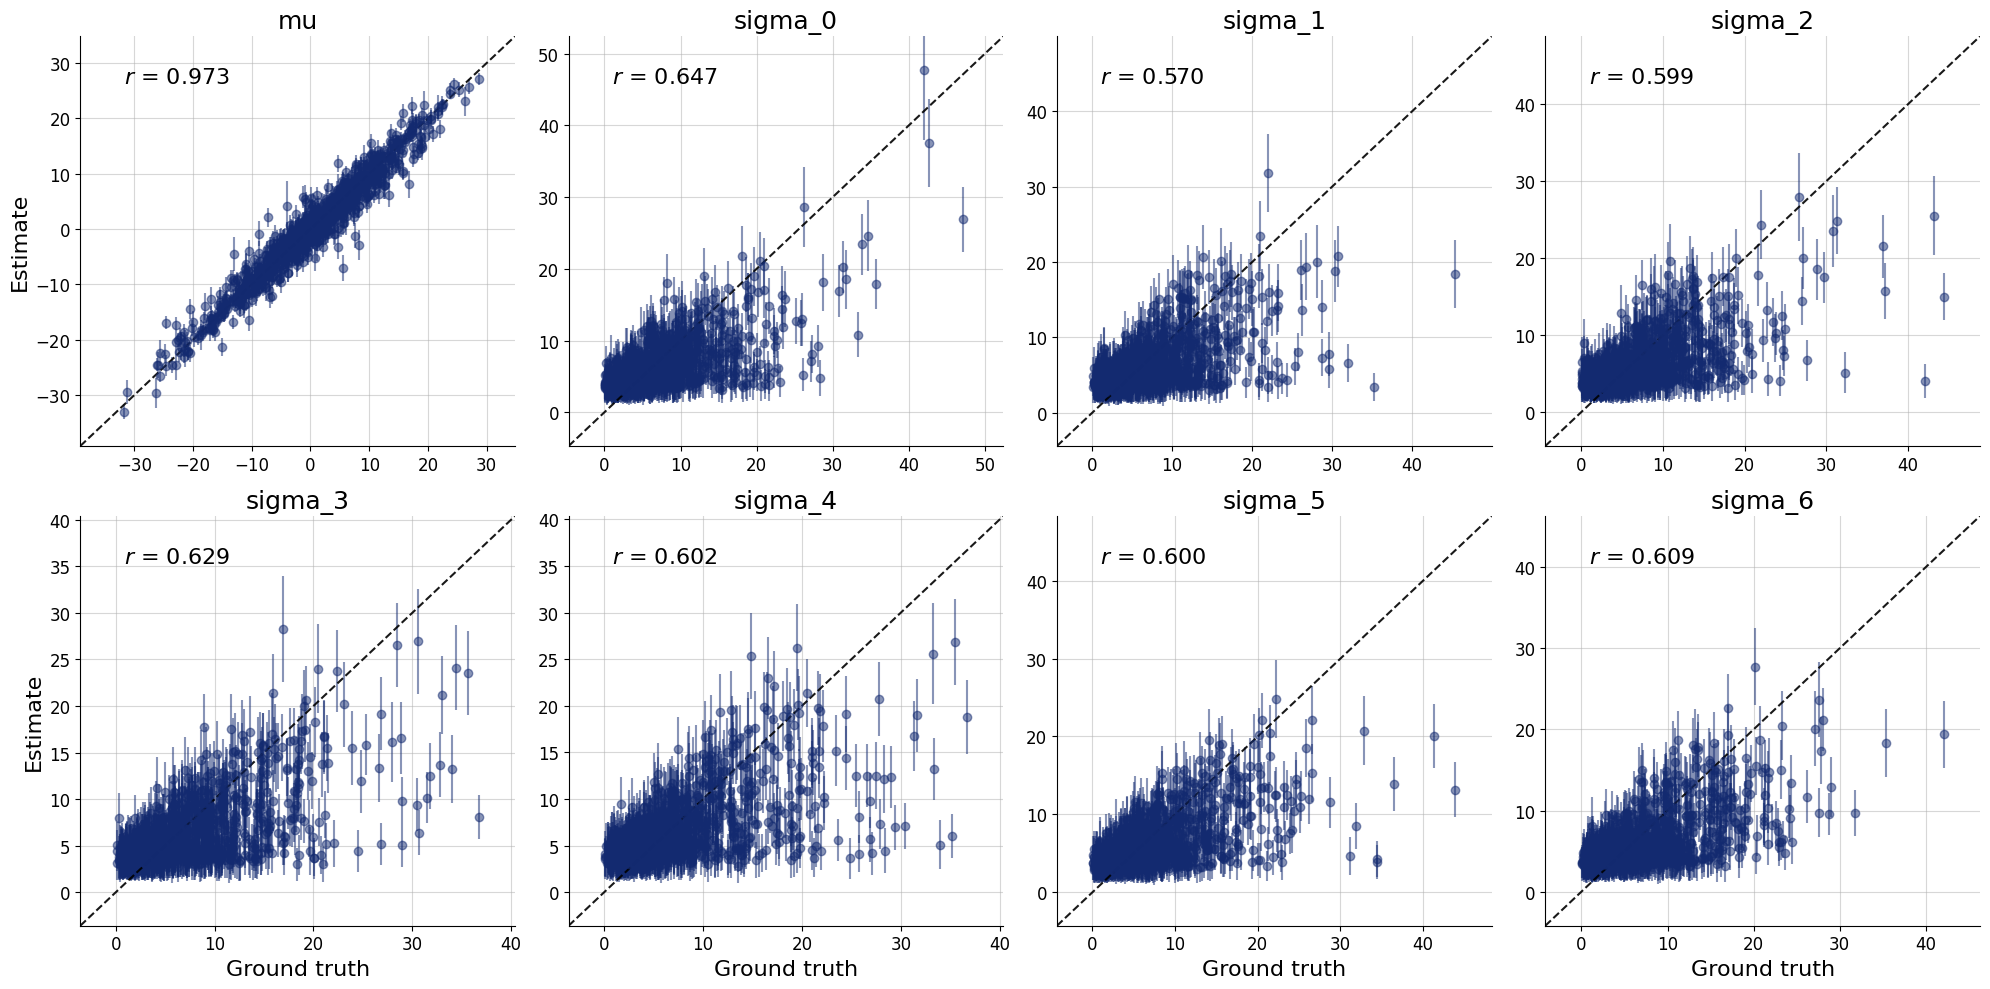

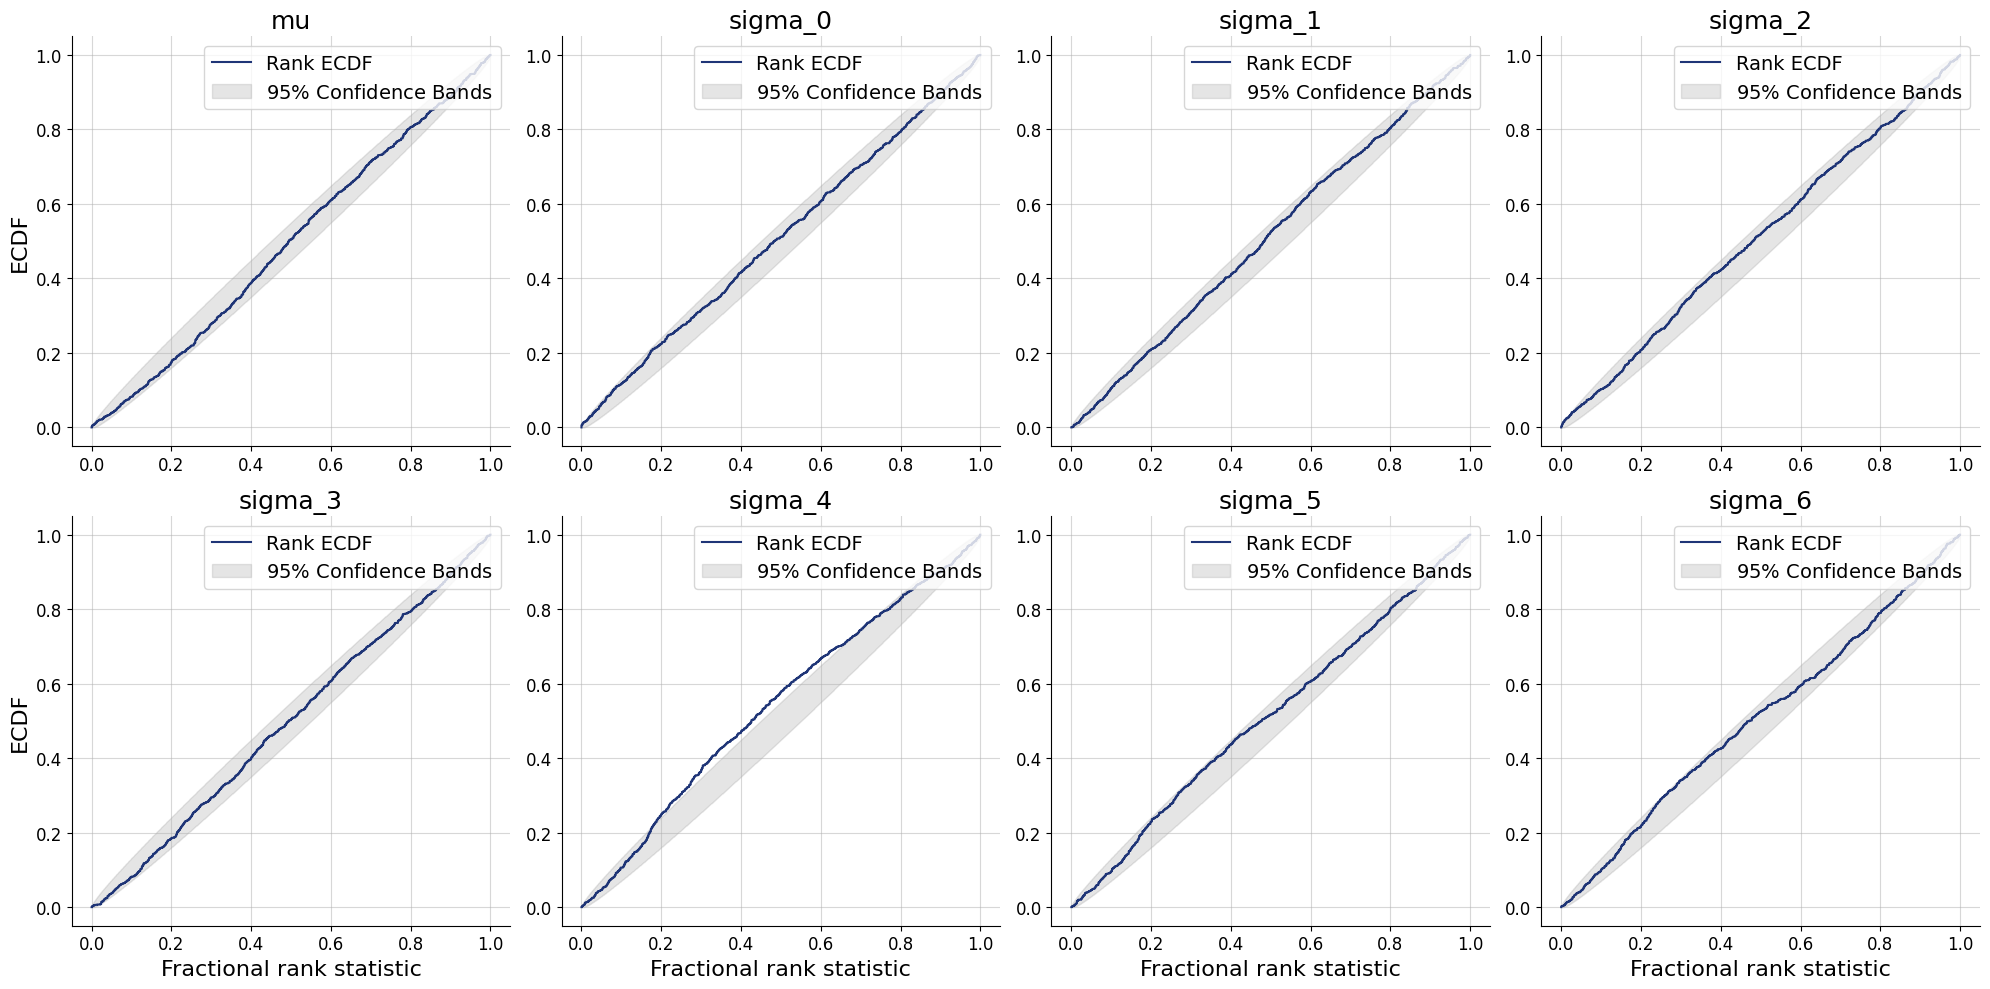

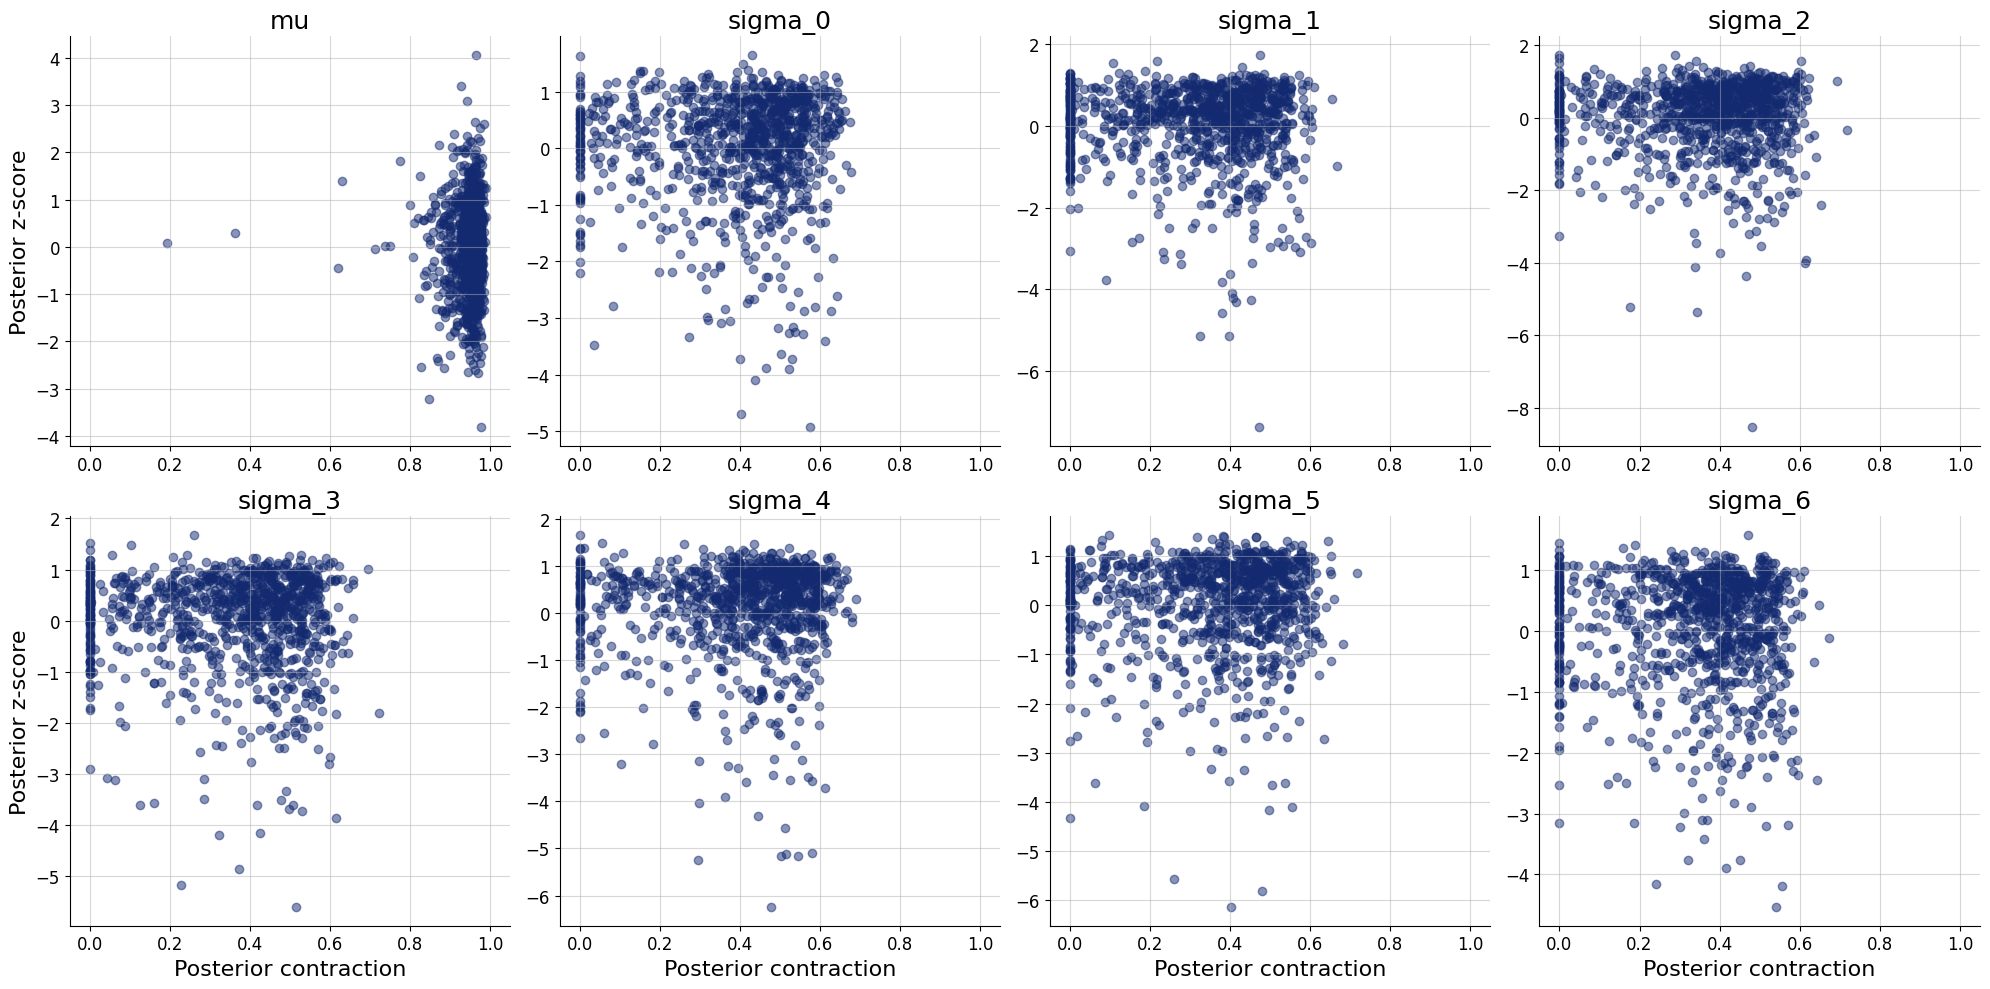

In [6]:
test_data=simulator.sample(1000)
figs=workflow.plot_default_diagnostics(test_data=test_data, num_samples=500)

### Inference

Here we will compute the parameter estimates for the problem of seven
scientists. Use them to answer the questions in the book (Lee &
Wagenmakers, 2013).

In [7]:
x=np.array([[-27.020, 3.570, 8.191, 9.898, 9.603, 9.945, 10.056]])
inference_data = dict(x=x)

In [8]:
samples=workflow.sample(num_samples=2000, conditions=inference_data, split=True)

In [9]:
workflow.samples_to_data_frame(samples).describe().transpose()

Lee, M. D., & Wagenmakers, E.-J. (2013). *Bayesian Cognitive Modeling: A
Practical Course*. Cambridge University Press.